In [2]:
import scanpy as sc
import anndata
import os
import pandas as pd

In [3]:
adata = sc.read_h5ad("perturbation/all_channels.h5ad")
adata

/gpfs/home/juntongy/miniforge3/envs/myenv/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 68900 × 32285
    obs: 'sample'
    layers: 'CRISPR'

In [ ]:
# read metadata csn
meta = pd.read_csv(
    "perturbation/all_channels_metadata_clean.csv",
    dtype=str
)

# confirm
print(meta.index.is_unique, len(meta), "cells in metadata")
print(meta.columns[:10])


True 68900 cells in metadata
Index(['cell_id', 'class_label', 'class_name',
       'class_bootstrapping_probability', 'subclass_label', 'subclass_name',
       'subclass_bootstrapping_probability', 'supertype_label',
       'supertype_name', 'supertype_bootstrapping_probability'],
      dtype='object')


In [5]:
meta.head()

,cell_id,class_label,class_name,class_bootstrapping_probability,subclass_label,subclass_name,subclass_bootstrapping_probability,supertype_label,supertype_name,supertype_bootstrapping_probability,cluster_label,cluster_name,cluster_alias,cluster_bootstrapping_probability
0,AAACCAAAGCCTTGCC-1,CS20230722_CLAS_09,09 CNU-LGE GABA,1.0,CS20230722_SUBC_061,061 STR D1 Gaba,0.99,CS20230722_SUPT_0267,0267 STR D1 Gaba_3,0.99,CS20230722_CLUS_0950,0950 STR D1 Gaba_3,1092,0.99
1,AAACCAAAGCGAGTCT-1,CS20230722_CLAS_07,07 CTX-MGE GABA,1.0,CS20230722_SUBC_053,053 Sst Gaba,1.0,CS20230722_SUPT_0217,0217 Sst Gaba_4,1.0,CS20230722_CLUS_0778,0778 Sst Gaba_4,497,1.0
2,AAACCAAAGCGTATTG-1,CS20230722_CLAS_02,02 NP-CT-L6b Glut,1.0,CS20230722_SUBC_032,032 L5 NP CTX Glut,1.0,CS20230722_SUPT_0126,0126 L5 NP CTX Glut_5,0.83,CS20230722_CLUS_0475,0475 L5 NP CTX Glut_5,83,0.83
3,AAACCAAAGGCCATCG-1,CS20230722_CLAS_02,02 NP-CT-L6b Glut,1.0,CS20230722_SUBC_029,029 L6b CTX Glut,1.0,CS20230722_SUPT_0113,0113 L6b CTX Glut_4,0.63,CS20230722_CLUS_0435,0435 L6b CTX Glut_4,38,0.63
4,AAACCAAAGGCCATGT-1,CS20230722_CLAS_02,02 NP-CT-L6b Glut,1.0,CS20230722_SUBC_030,030 L6 CT CTX Glut,1.0,CS20230722_SUPT_0115,0115 L6 CT CTX Glut_2,0.56,CS20230722_CLUS_0444,0444 L6 CT CTX Glut_2,70,0.28


In [6]:
adata.obs_names

Index(['AAACCAAAGCCTTGCC-1', 'AAACCAAAGCGAGTCT-1', 'AAACCAAAGCGTATTG-1',
       'AAACCAAAGGCCATCG-1', 'AAACCAAAGGCCATGT-1', 'AAACCAGCAAACACTC-1',
       'AAACCAGCAAATGAAC-1', 'AAACCAGCAAATGGCA-1', 'AAACCAGCAACCCTCT-1',
       'AAACCAGCAAGAGAGG-1',
       ...
       'GTTGTGCAGCTCGAGT-1', 'GTTGTGCAGGGTACGA-1', 'GTTGTGCAGGTAATGA-1',
       'GTTGTGGGTAACCCGA-1', 'GTTGTGGGTAATTTGG-1', 'GTTGTGGGTATATTGG-1',
       'GTTGTGGGTCTAGCTC-1', 'GTTGTGGGTGGCAAGG-1', 'GTTGTGGGTGGCGAGA-1',
       'GTTGTGGGTGTGTAGT-1'],
      dtype='object', length=68900)

In [ ]:
# duplicated metadata
dupes = meta['cell_id'][meta['cell_id'].duplicated()]
print(dupes.unique())

# drop all but the first occurrence
meta_unique = meta.drop_duplicates(subset='cell_id', keep='first')

# set_index
meta_unique = meta_unique.set_index('cell_id', verify_integrity=True)


In [ ]:
#join metadata
adata.obs[meta_unique.columns] = meta_unique


In [11]:
for col in adata.obs.columns:
    if adata.obs[col].dtype == object:
        adata.obs[col] = adata.obs[col].astype("category")

In [12]:
adata

AnnData object with n_obs × n_vars = 68900 × 32285
    obs: 'sample', 'class_label', 'class_name', 'class_bootstrapping_probability', 'subclass_label', 'subclass_name', 'subclass_bootstrapping_probability', 'supertype_label', 'supertype_name', 'supertype_bootstrapping_probability', 'cluster_label', 'cluster_name', 'cluster_alias', 'cluster_bootstrapping_probability'
    layers: 'CRISPR'

In [13]:
adata.write_h5ad("perturbation/all_channel_with_metadata.h5ad")


## Visualization

In [14]:
probs = adata.obs['subclass_bootstrapping_probability'].values


In [15]:
probs

['0.99', '1.0', '1.0', '1.0', '1.0', ..., '1.0', '0.27', '0.65', '1.0', '0.74']
Length: 68900
Categories (89, object): ['0.11', '0.13', '0.14', '0.15', ..., '0.97', '0.98', '0.99', '1.0']

In [24]:
adata.obs['subclass_name'].nunique()

236

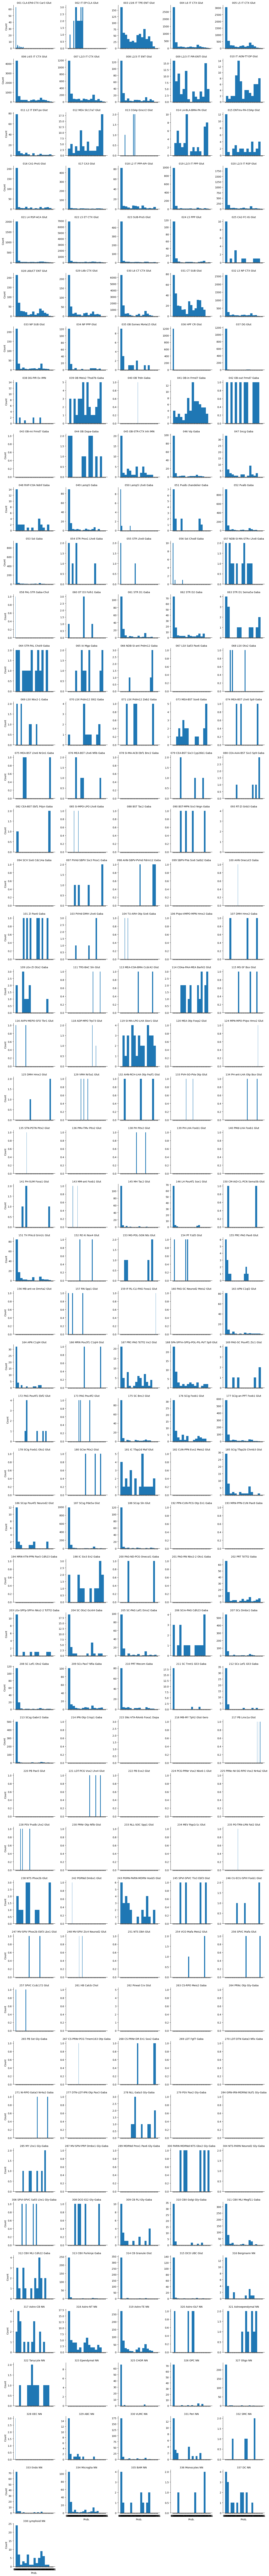

In [ ]:
g = sns.FacetGrid(
    df,
    col="subclass_name",
    col_wrap=5,  
    sharex=True, sharey=False
)
g.map(plt.hist, "subclass_bootstrapping_probability", bins=15)
g.set_axis_labels("Prob.", "Count")
g.set_titles("{col_name}")
plt.tight_layout()
plt.show()


In [25]:
plt.savefig("perturbation/perbootstrap_probs_by_subclass.pdf", format="pdf", bbox_inches="tight")


<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd

print(adata.obs.dtypes["subclass_bootstrapping_probability"])
# → category

# convert to float
adata.obs["subclass_bootstrapping_probability"] = (
    pd.to_numeric(
        adata.obs["subclass_bootstrapping_probability"],
        errors="coerce"      # any non-numbers become NaN
    )
)

print(adata.obs.dtypes["subclass_bootstrapping_probability"])
# → float64

medians = (
    adata.obs
    .groupby("subclass_name")["subclass_bootstrapping_probability"]
    .median()
)
top_subclass = medians.idxmax()
print("Top subclass:", top_subclass)


category
float64
Top subclass: 001 CLA-EPd-CTX Car3 Glut


/tmp/ipykernel_12456/13970848.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("subclass_name")["subclass_bootstrapping_probability"]


/tmp/ipykernel_12456/2240721293.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("subclass_name")["subclass_bootstrapping_probability"]


Top 10 subclasses: ['001 CLA-EPd-CTX Car3 Glut', '004 L6 IT CTX Glut', '008 L2/3 IT ENT Glut', '006 L4/5 IT CTX Glut', '011 L2 IT ENT-po Glut', '022 L5 ET CTX Glut', '023 SUB-ProS Glut', '020 L2/3 IT RSP Glut', '017 CA3 Glut', '018 L2 IT PPP-APr Glut']


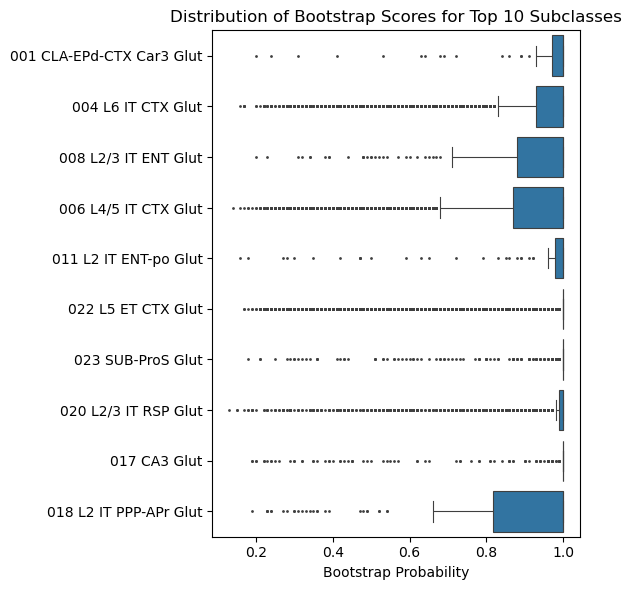

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

adata.obs["subclass_bootstrapping_probability"] = pd.to_numeric(
    adata.obs["subclass_bootstrapping_probability"],
    errors="coerce"
)

medians = (
    adata.obs
    .groupby("subclass_name")["subclass_bootstrapping_probability"]
    .median()
    .sort_values(ascending=False)
)
top10 = medians.head(10).index.tolist()
print("Top 10 subclasses:", top10)

# Subset adata.obs to only those 10
df_top10 = adata.obs[adata.obs["subclass_name"].isin(top10)].copy()

#Plot a boxplot
plt.figure(figsize=(6,6))
sns.boxplot(
    y="subclass_name",
    x="subclass_bootstrapping_probability",
    data=df_top10,
    order=top10,
    fliersize=1,
    linewidth=0.8
)
plt.xlabel("Bootstrap Probability")
plt.ylabel("")
plt.title("Distribution of Bootstrap Scores for Top 10 Subclasses")
plt.tight_layout()
plt.savefig("top10_bootstrap_boxes.pdf", bbox_inches="tight")
plt.show()


## Analysis

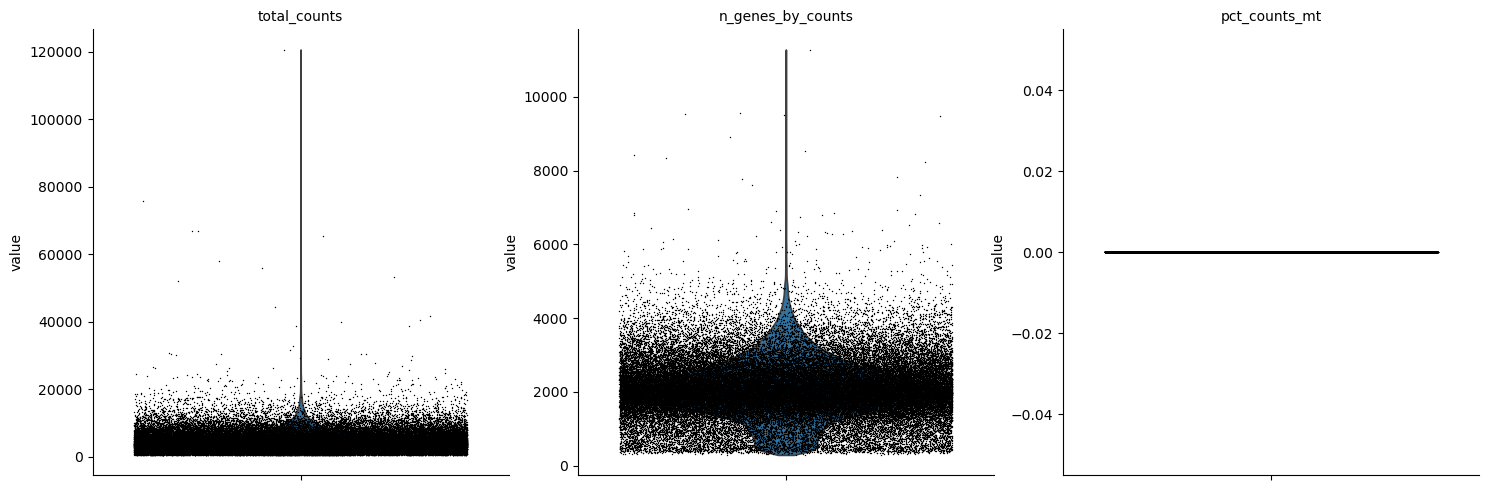

In [33]:
import matplotlib as mpl
import scanpy as sc

# 1. set global figure size
mpl.rcParams['figure.figsize'] = (6, 3)

# 2. call violin exactly as before (drop figsize)
sc.pl.violin(
    adata,
    ['total_counts','n_genes_by_counts','pct_counts_mt'],
    jitter=0.4,
    multi_panel=True
)
